  0%|          | 0/25 [00:00<?, ?it/s]

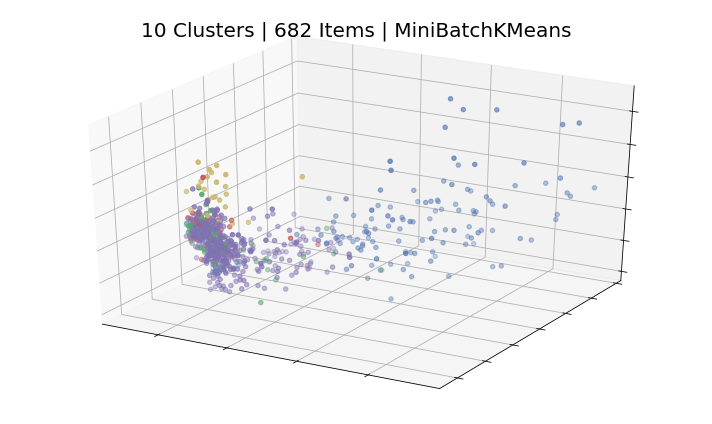

  4%|▍         | 1/25 [00:01<00:30,  1.28s/it]

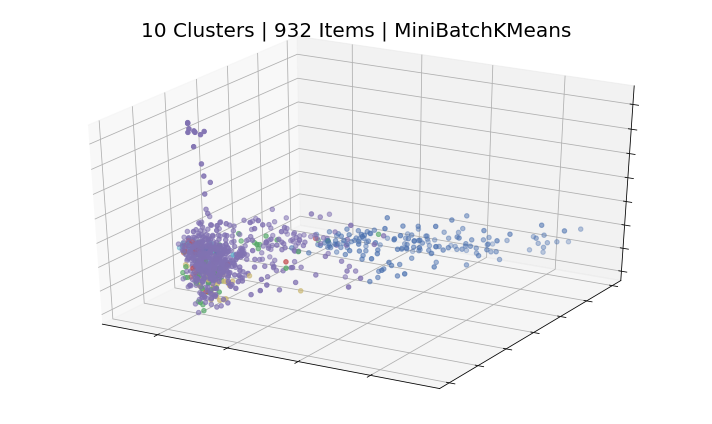

  8%|▊         | 2/25 [00:02<00:30,  1.30s/it]

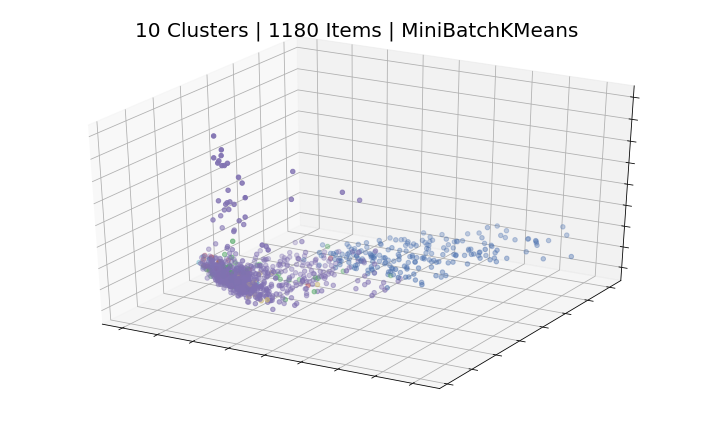

 12%|█▏        | 3/25 [00:03<00:28,  1.32s/it]

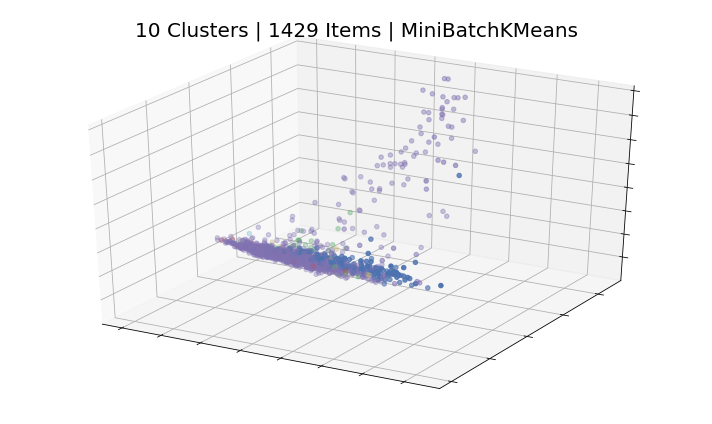

 16%|█▌        | 4/25 [00:05<00:27,  1.33s/it]

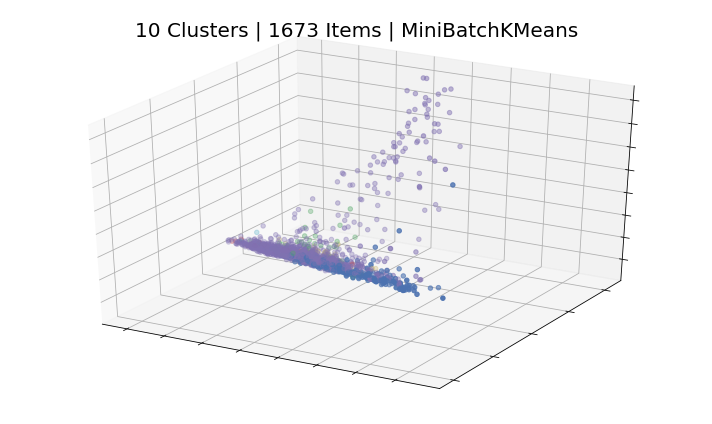

 20%|██        | 5/25 [00:06<00:26,  1.35s/it]

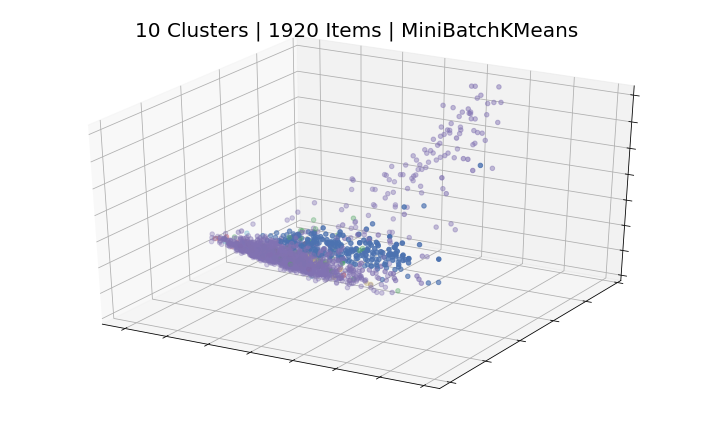

 24%|██▍       | 6/25 [00:08<00:26,  1.37s/it]

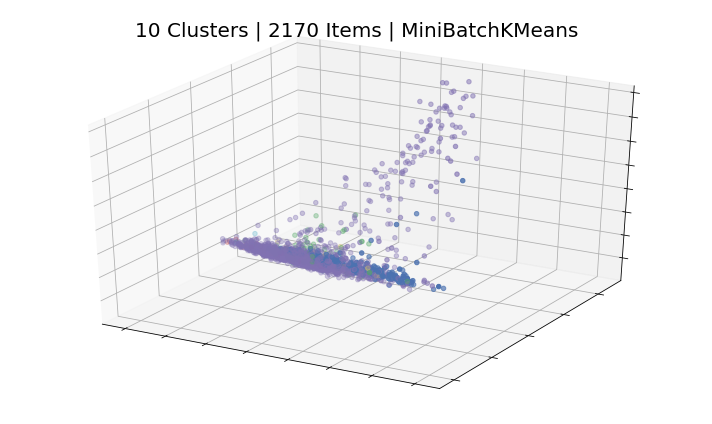

 28%|██▊       | 7/25 [00:09<00:25,  1.39s/it]

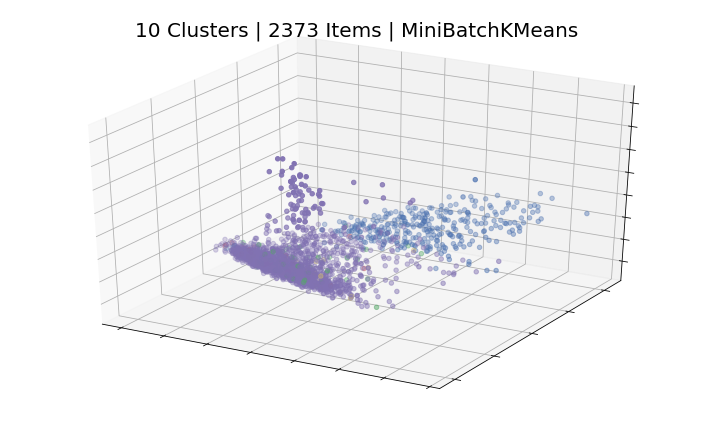

 32%|███▏      | 8/25 [00:11<00:24,  1.41s/it]

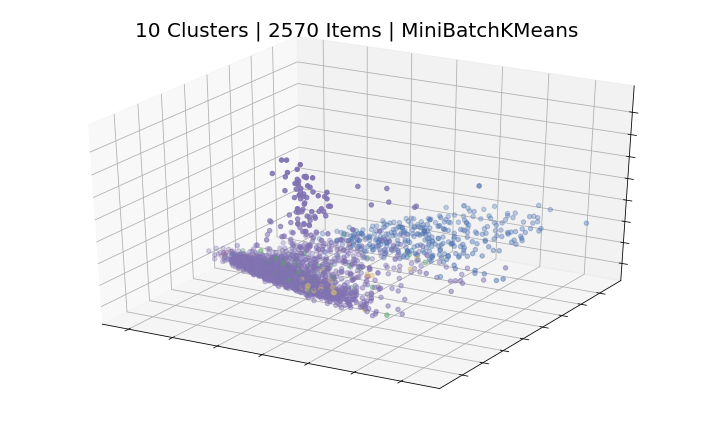

 36%|███▌      | 9/25 [00:12<00:22,  1.40s/it]

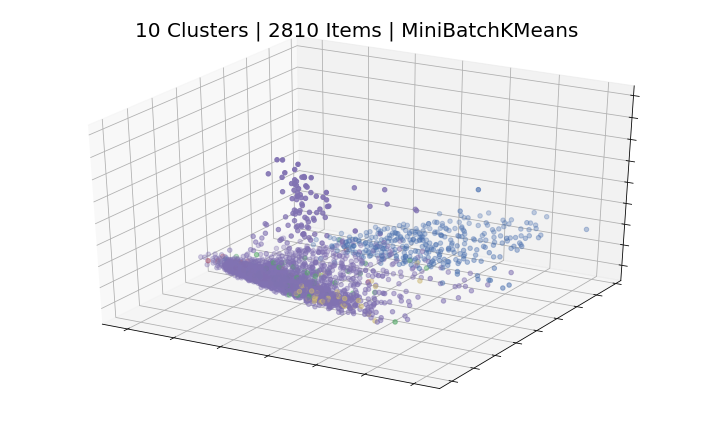

 40%|████      | 10/25 [00:13<00:20,  1.40s/it]

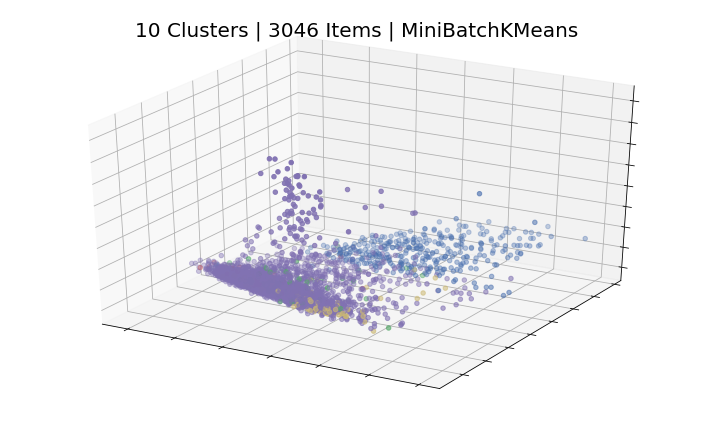

 44%|████▍     | 11/25 [00:15<00:19,  1.40s/it]

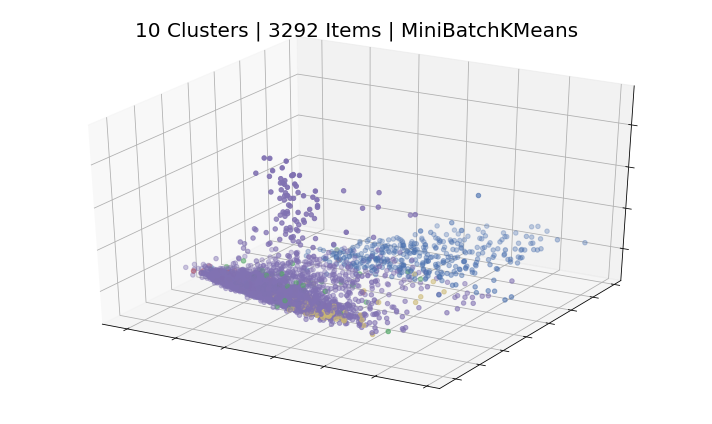

 48%|████▊     | 12/25 [00:16<00:18,  1.41s/it]

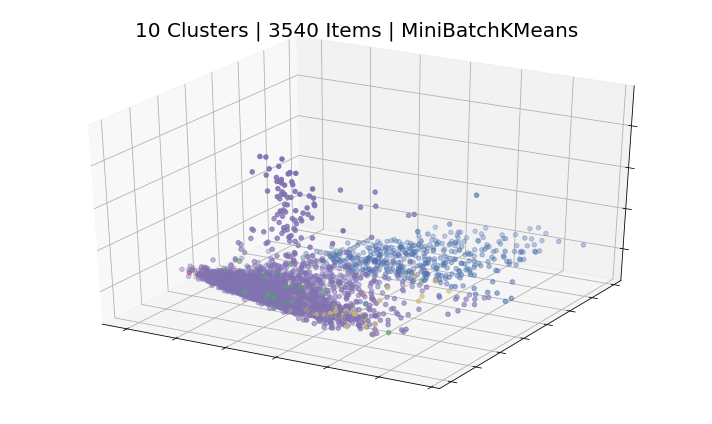

 52%|█████▏    | 13/25 [00:18<00:17,  1.42s/it]

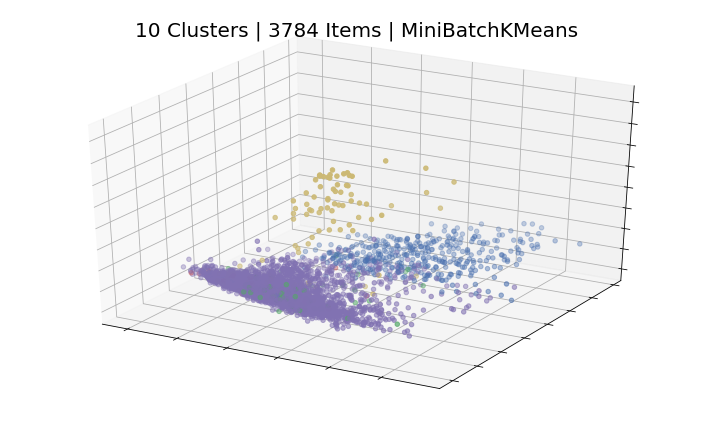

 56%|█████▌    | 14/25 [00:19<00:15,  1.42s/it]

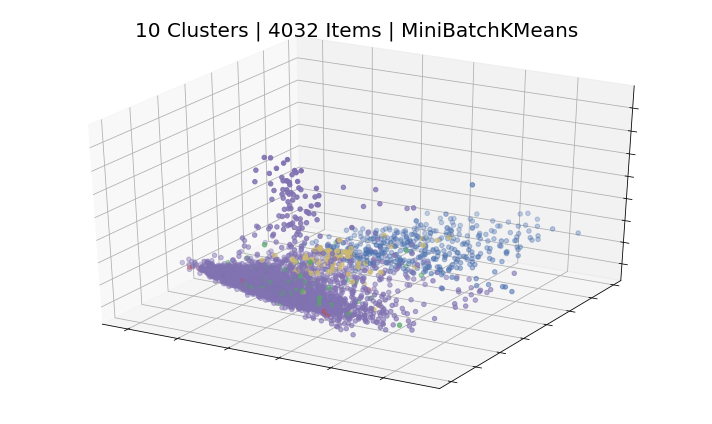

 60%|██████    | 15/25 [00:21<00:14,  1.43s/it]

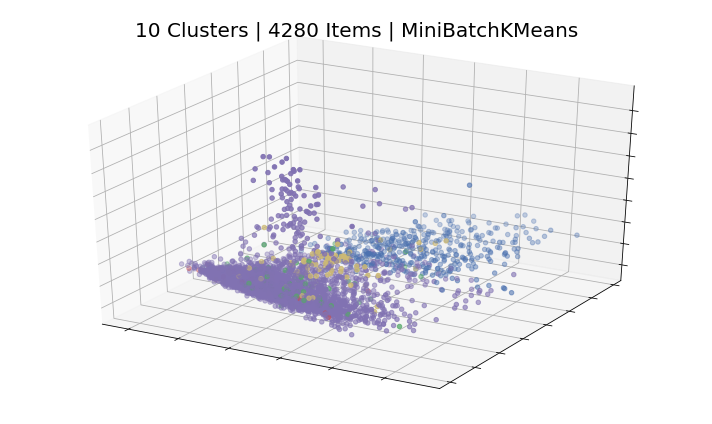

 64%|██████▍   | 16/25 [00:23<00:13,  1.45s/it]

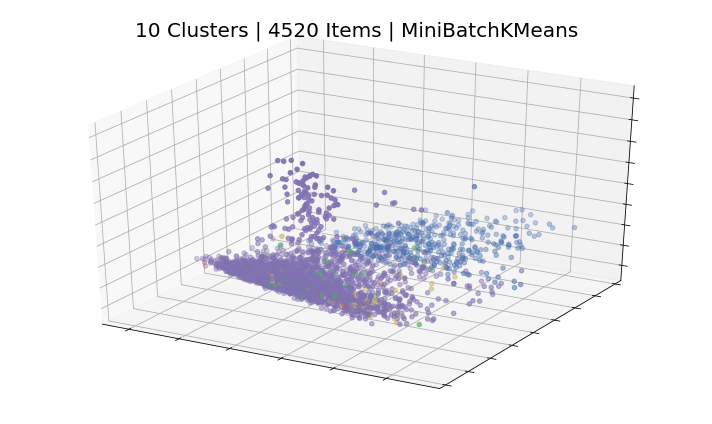

 68%|██████▊   | 17/25 [00:24<00:11,  1.47s/it]

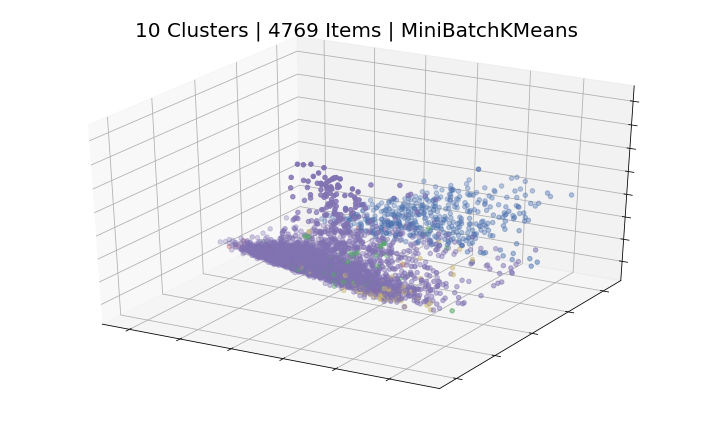

 72%|███████▏  | 18/25 [00:26<00:10,  1.48s/it]

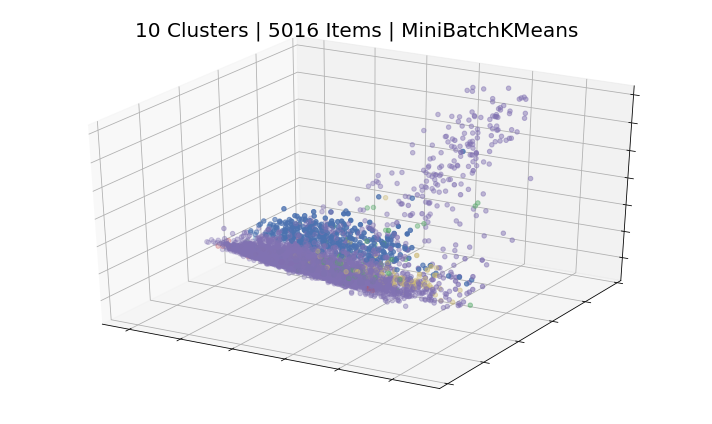

 76%|███████▌  | 19/25 [00:28<00:08,  1.49s/it]

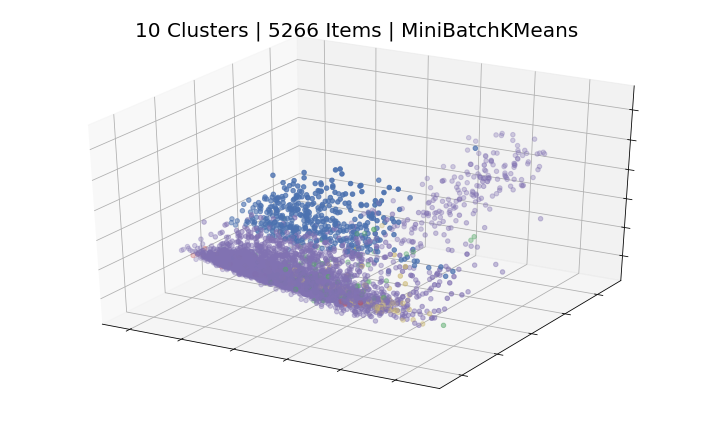

 80%|████████  | 20/25 [00:30<00:07,  1.50s/it]

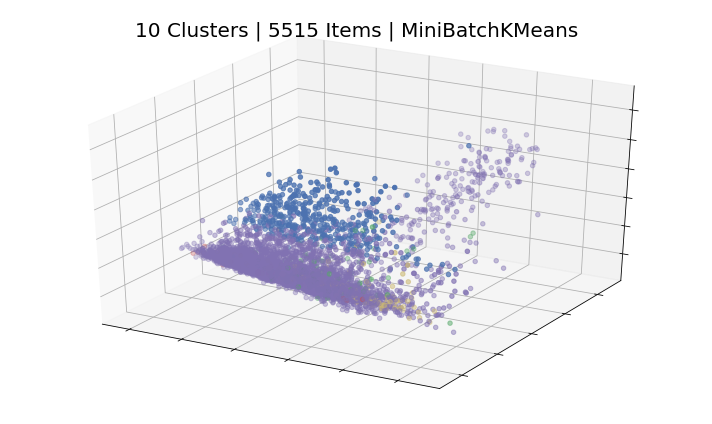

 84%|████████▍ | 21/25 [00:31<00:06,  1.51s/it]

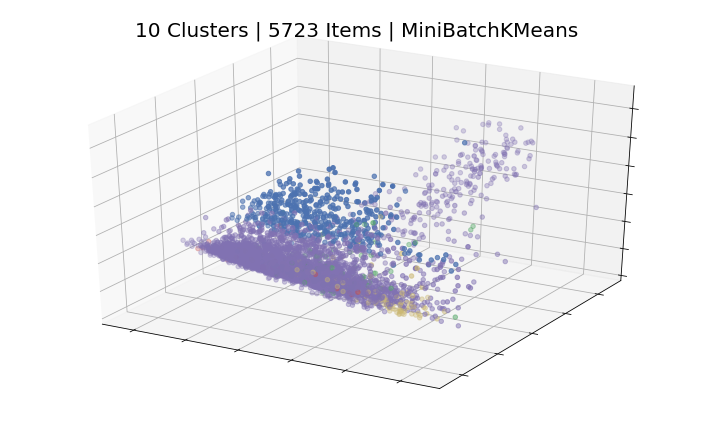

 88%|████████▊ | 22/25 [00:33<00:04,  1.52s/it]

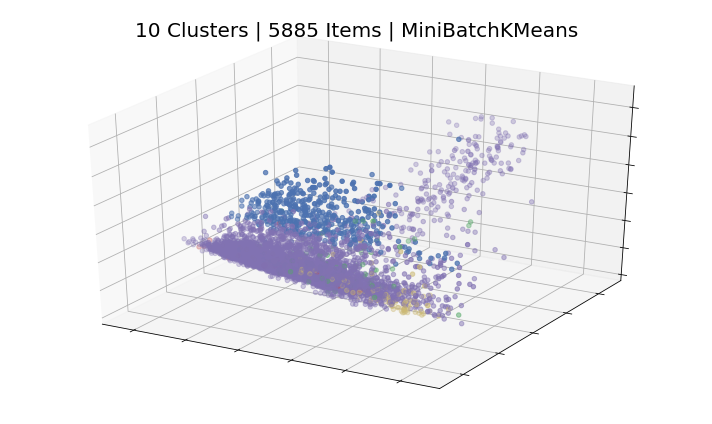

 92%|█████████▏| 23/25 [00:34<00:03,  1.52s/it]

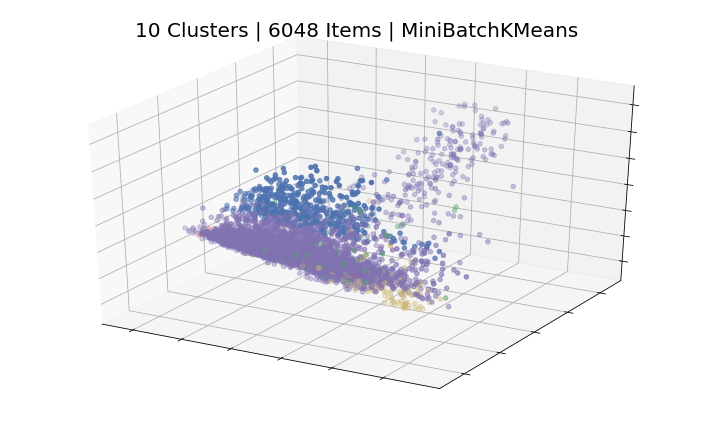

 96%|█████████▌| 24/25 [00:36<00:01,  1.52s/it]

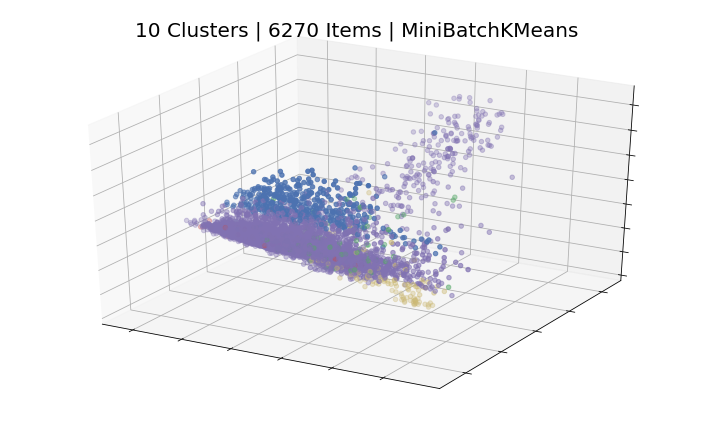

100%|██████████| 25/25 [00:38<00:00,  1.53s/it]


In [35]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

from src.clustering import OnlineCluster, Cluster
from src.modules import StreamData

import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm


# Initialize streamer, cluster (this is the data that will be used to create TFIDF matrix)
streamer = StreamData(filename='../data/talk_radio.csv', chunk=500, use_column='sentences')
init_text = streamer._init_data(10)
online = OnlineCluster(text=list(init_text.processed), method='kmeans', n_clusters=10)

num_batches = 25

for _ in tqdm(range(num_batches)):
    
    # Get new batch
    new_text = streamer()
    
    # Predict
    labels = online.predict(list(new_text.processed))
    
    # Plot
    fig = online.viz3D()
    
    # Optional save figure
    # fig.savefig('../data/out-%s.png' % (str(datetime.now()).split(' ')[1]))

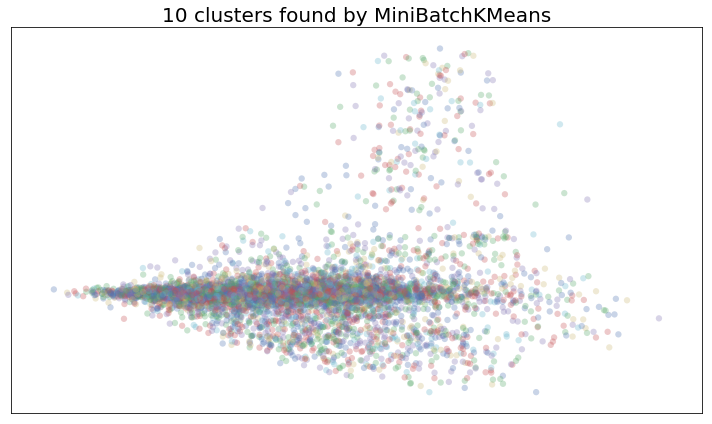

In [43]:
# Not super informative in 2D
_ = online.viz2D()

In [40]:
_ = online.top_terms()

Top terms per cluster:
Cluster 0 (8 items): richard | face | book | shared | anything | civilization | everybody | experience | florence | clinton
Cluster 1 (21 items): war | syria | guy | civil | dog | libya | others | lines | worry | americans
Cluster 2 (14 items): cancer | immune | response | patients | therapy | diabetes | treatment | problem | rate | beat
Cluster 3 (5239 items): retirement | let | story | went | person | feel | started | believe | financial | job
Cluster 4 (157 items): estate | real | zero | market | pools | mortgage | eighteen | buy | yes | gmc
Cluster 5 (10 items): uk | small | border | business | operator | businesses | sitting | irish | preparing | customs
Cluster 6 (477 items): chemical | weapons | syria | strikes | russia | attack | syrian | regime | united | military
Cluster 7 (143 items): credit | debt | card | pay | payments | love | income | minimum | making | month
Cluster 8 (27 items): hope | project | summertime | org | electric | slash | auto | certi

In [41]:
online.results[2]

['seeing rapidly involving field fantastic ideas quickly past clinical trials higher success rate works cancer perspective advance past almost patients die disease used deadly substantial patients become term respond essence response improving immune response exists bring players immune system game',
 'casualties influence competing power centers uranium regime hardliners less agree everything competing each blame each problem act voice economy plummeted complaining economy virtually worthless happy ongoing demonstrations iran haven authoritarian regime internal depression flat haven enemy beat baseball bat regime wrong external enemy difficult typically history iranian regime pressure tend pull closet heritage adults america pre diabetes let reverse becomes type diabetes professional basketball players julius rental everything reverse recommend reverse took learn speak reverse almost diabetes living words mom type diabetes almost together wanna million americans risk exercising health